In [1]:
#This notebook applies Python to problems appearing in other Speed courses taken around the same time as ECE 322
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


Diagonalize a Matrix

In [45]:
#Diagonalize. Here is the symbolic computation module sympy. It was in my default Anaconda installation on windows
import sympy as sp
M=sp.Matrix([[3,-2,4,-2],[5,3,-3,-2],[5,-2,2,-2],[5,-2,-3,3]])
M.diagonalize() #It returns two matrices (P,D), where the second matrix D is the diagonalized matrix,
#and M = PDP^-1


(Matrix([
 [0, 1, 1,  0],
 [1, 1, 1, -1],
 [1, 1, 1,  0],
 [1, 1, 0,  1]]), Matrix([
 [-2, 0, 0, 0],
 [ 0, 3, 0, 0],
 [ 0, 0, 5, 0],
 [ 0, 0, 0, 5]]))

In [ ]:
#Now that you have a Sympy matrix, you can easily find other values associated with it.
M.eigenvals(),M.eigenvects()#eigenvalues --this example has 2 eigenvectors associated with eigenvalue 5
#eigenvects gives the eigenvalue, its multiplicity, and the eigenvector(s) that go with it

Solve a System of Equations/ Use Python to Solve Electrical Circuits

In [56]:
#These ideas are closely related to matrix solving. 
#I decided to make this example based on a circuit problem. Here is a walkthrough 
#of a specific circuit in Matlab--  https://www.youtube.com/watch?v=t1idZaks29w for how to do it in MATLAB!
#We'll solve it in Python.
R1=100
R2=50
R3=100
R4=200
R5=100

V1=5.0 #Known voltage at battery 1
V2=10.0 #Known voltage at battery 2
A=sp.Matrix([[R1+R4,-R4,0],[-R4,R2+R4+R5,-R5],[0,-R5,R3+R5]])
b=sp.Matrix([[V1],[0],[V2]])
#3 equations, 3 unknowns: the current in each loop of the network
#A X =b where A is the resistor matrix, X is the unknown current vector i1,i2,i3, and V is the voltages at the nodes

X=A.inv()*b #This will look pretty similar in MATLAB (you can also do matrix division \) except
#since everything in MATLAB is assumed to be a matrix, you don't have to use a special Matrix class.

Matrix([
[ 0.05],
[ 0.05],
[0.075]])

Bode Plots

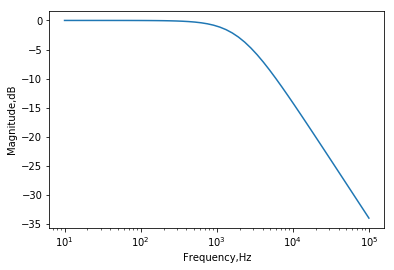

In [19]:
#This example provides context and shows how you can do this same example fast using scipy 
#https://staff.fnwi.uva.nl/r.vandenboomgaard/SP20162017/Python/bodeplots.html

def H(w):   #Return your transfer function, you got this expression after you did some math
    wc = 4000*np.pi  #Your corner frequency
    return 1.0 / (1.0 + 1j * w / wc)    #Your transfer function - write it out on the board

f = np.logspace(1,5) # frequencies from 10**1 to 10**5

plt.semilogx(f, 20*np.log10(abs(H(2*np.pi*f))));   #Plot the magnitude of your transfer function
plt.xlabel('Frequency,Hz')
plt.ylabel('Magnitude,dB')
plt.savefig('BodeMagnitude.png') #Grab the plot for your homework. It will be in the same folder with this .ipynb file

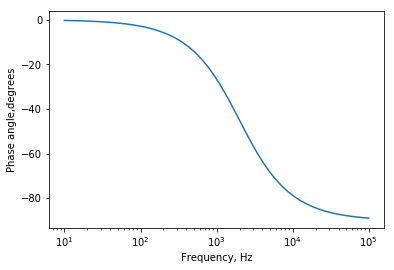

In [20]:
#Now do the phase plot
plt.semilogx(f,np.angle(H(2*np.pi*f))*180.0/np.pi)#Get angle of H and convert it to degrees, then plot vs frequency
plt.xlabel('Frequency, Hz')
plt.ylabel('Phase angle,degrees')
plt.savefig('BodePhase.png') #If you want a vector format, eps lets you edit colors and linewidths outside python

Infinite Potential Well

In [21]:
#Here is an example based on the particle-in-a-box problem. 
#Great explainer here https://www.wired.com/2016/03/can-solve-quantum-mechanics-classic-particle-box-problem-code/

#The goal is to find the coefficients of an equation that describes the probability of finding the particle at a location.
#Yes, you can solve it analytically using boundary values so why bother?
#Because numerical integration is neeeded to solve more complex problems
#like double wells with a barrier between, wells that aren't infinitely deep. Particle can "tunnel" across-- 
#Sounds exotic but appears in everyday technology like optical fibers and some kinds of diodes.




3.02
3.04
3.06
3.08
3.1
3.12
3.14
3.16
3.18
3.2
3.22
3.24
3.2600000000000002
3.2800000000000002
3.3000000000000003
3.3200000000000003
3.3400000000000003
3.3600000000000003
3.3800000000000003
3.4000000000000004
3.4200000000000004
3.4400000000000004
3.4600000000000004
3.4800000000000004
3.5000000000000004
3.5200000000000005
3.5400000000000005
3.5600000000000005
3.5800000000000005
3.6000000000000005
3.6200000000000006
3.6400000000000006
3.6600000000000006
3.6800000000000006
3.7000000000000006
3.7200000000000006
3.7400000000000007
3.7600000000000007
3.7800000000000007
3.8000000000000007
3.8200000000000007
3.8400000000000007
3.8600000000000008
3.880000000000001
3.900000000000001
3.920000000000001
3.940000000000001
3.960000000000001
3.980000000000001
4.000000000000001
4.0200000000000005
4.04
4.06
4.079999999999999
4.099999999999999
4.119999999999998
4.139999999999998
4.1599999999999975
4.179999999999997
4.199999999999997
4.219999999999996
4.239999999999996
4.259999999999995
4.279999999999995

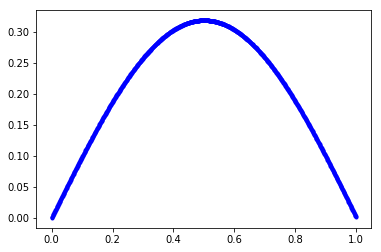

In [34]:

L=1.0
hc=1.0 #this is m/h-bar^2
dx=0.001
E=3 #Initial guess for energy E
dE=0.02
searching=True
while searching:
    x=[0.0]
    dpsi=1.0
    psi=[0.0]

    while x[-1]<=L:
  
        ddpsi=-2*hc*E*psi[-1]
        dpsi=dpsi+ddpsi*dx
        psi.append(psi[-1]+dpsi*dx)
        x.append(x[-1]+dx)
        
      
    if abs(psi[-1])<0.002:
        searching=False
         
    E=E+dE
    print(E) #watch E step toward the next value that makes psi(x=L) be within 0.002 of 0
    
plt.plot(x,psi,'b.')
